In [1]:
import pandas as pd
import numpy as np

%matplotlib inline


req311 = pd.read_csv("dataset.csv").dropna().sort_values("NEIGHBORHOOD") #Importing the data
Req311 = req311["NEIGHBORHOOD"].unique().tolist() #Create an array of all the neighborhoods

# Looking at 311 Data for Livability

For our metric of livability, I wanted to look at data on 311 requests to see how often each neighborhood has some sort of obstruction or infrastructure problem that needs taken care of. This data set includes reports on things like potholes, downed trees, cars parked in the middle of the street, etc. over the past 6 years. These type of things contribute to our idea of comfort and which neighborhoods would be the nicest to live in. For our purposes the neighborhoods with the least amound of 311 requests, will rank the highest. 

<AxesSubplot:xlabel='NEIGHBORHOOD'>

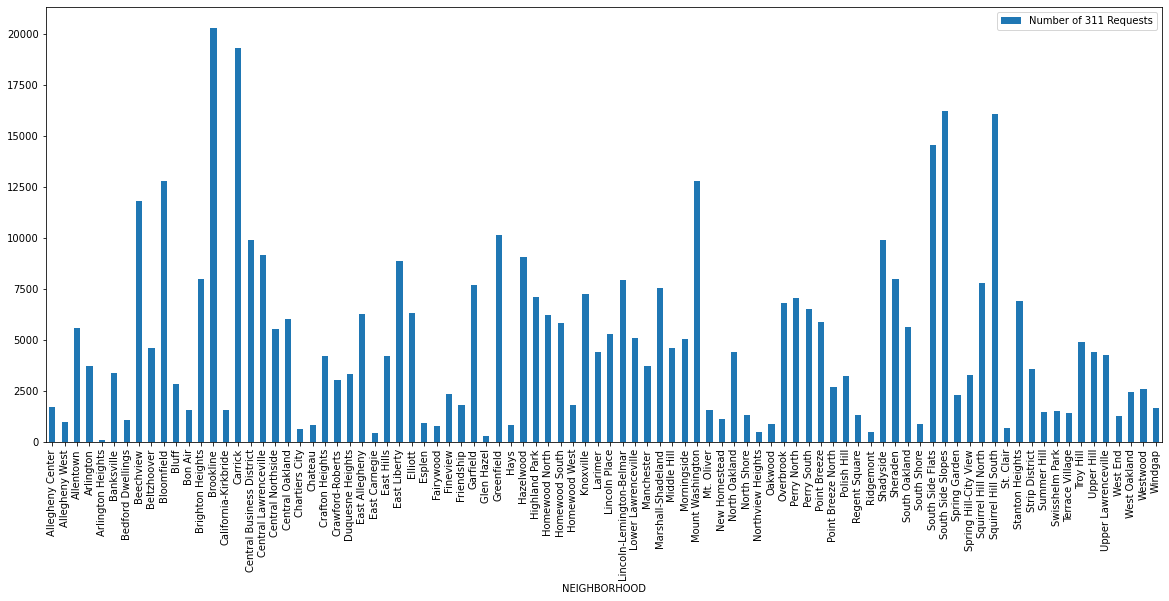

In [2]:
Total = [] #Making an array of size 90
for r in range(90):
    Total.append(0)
    
for r in range(len(req311)): #Counts the ammount of 311 requests per neighborhood
    neighborhood = req311.iloc[r,6] #Gets the neighborhood from each row in the dataframe
    i = Req311.index(neighborhood) #Finds that neighorhood in the Req311 array
    Total[i]+=1  #Adds to that neighborhoods total
    
ReqNum = [[]]  #Makes an empty 2d array
for i in range(90): #Make the data readable by pandas
    ReqNum[i].append(Req311[i]) #Add neighborhood to current row
    ReqNum[i].append(Total[i]) #Add 311 total to current row
    
    ReqNum.insert(i+1, []) #Add a new row at the end of each loop

del ReqNum[90] #Delete the extra row created at the end

Req311Total = pd.DataFrame(ReqNum, columns=["NEIGHBORHOOD", "Number of 311 Requests"])

Req311Total.plot.bar(x="NEIGHBORHOOD", figsize=(20,8))

# Review of the Data

After sorting and graphing the data, I came up with a scoring system where neighborhoods under 100 request get 5 points, then under 500 requests get 3 points, 1000 requests 1 point, and anything else, 0 points.

In [12]:
Scores = Req311Total['Number of 311 Requests'].tolist()
ScoreList = []

for r in range(90): #Make an array for the scores
    ScoreList.append(0)
    
for r in range(90):  #Add scores for each neighborhood
    if Scores[r] < 100:
        ScoreList[r] = 5
    elif 100 < Scores[r] < 500:
        ScoreList[r] = 3
    elif 500 < Scores[r] < 1000:
        ScoreList[r] = 1
    else:
        ScoreList[r] = 0
ScoreNum = [[]]
for i in range(90) : #Rearrange the data
    ScoreNum[i].append(Req311[i])
    ScoreNum[i].append(ScoreList[i])
    
    ScoreNum.insert(i+1, [])
    
del ScoreNum[90] #delete the extra row created at the end of the loop

ReqScores = pd.DataFrame(ScoreNum, columns = ["NEIGHBORHOOD", "Score"])
ReqScores = ReqScores.sort_values("Score", ascending = False)

ReqScores.head(10)

NEIGHBORHOOD  Score
4   Arlington Heights      5
26      East Carnegie      3
66          Ridgemont      3
35         Glen Hazel      3
57  Northview Heights      3
30             Esplen      1
70        South Shore      1
31          Fairywood      1
21            Chateau      1
20     Chartiers City      1

# Scoring
This table shows the top 10 neighborhoods by from this dataset. By this metric, Arlington Heights would be the best neighborhood, with a score of 5 points for being the only neighborhood under one hundred 311 requests.